### The University of Melbourne, School of Computing and Information Systems
# COMP90086 Computer Vision, 2022 Semester 2

## Assignment

In [5]:
import os
import cv2
import math
import numpy as np
from tqdm import tqdm
import threading
global THREAD_NUM 
THREAD_NUM = 16

Question 1

In [33]:
def ssd_(st,end,imgL,imgR,window_size):
    width, height = imgL.shape[:2]

    for i in range(st,end):
      for j in range(window_size//2, height-window_size//2):
          min_ssd = float('inf')
          for k in range(32):
            if j-k < window_size//2:
              break
            ssd = np.sum((imgL[i-window_size//2:i+window_size//2+1, j-window_size//2:j+window_size//2+1] - imgR[i-window_size//2:i+window_size//2+1, j-window_size//2-k:j+window_size//2+1-k])**2)
  
            if ssd < min_ssd:
              min_ssd = ssd
              disparity[i,j] = k


def ssd(imgL,imgR,window_size):
  width, height = imgL.shape[:2] 
  st = window_size//2
  end = width-window_size//2
  chunk = math.ceil((end - st) / THREAD_NUM)
  thread_list = []
  for treadno in range(THREAD_NUM):
    i_end = min((st + chunk * (treadno+1),end))
    #ssd_((st + chunk * treadno),i_end,imgL,imgR,window_size)

    t = threading.Thread(target=ssd_,args=((st + chunk * treadno),i_end,imgL,imgR,window_size))
    t.start()
    thread_list.append(t)
  for i in range(len(thread_list)):
    thread_list[i].join()

In [34]:
global disparity


# read images
imgL = cv2.imread('left.jpg', cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread('right.jpg', cv2.IMREAD_GRAYSCALE)
# SSD
print("SSD")

lock = threading.Lock()
width, height = imgL.shape[:2]
disparity = np.zeros((width, height), np.uint8) 


ssd(imgL,imgR,8)
cv2.imwrite('ssd.png', disparity)


SSD


True

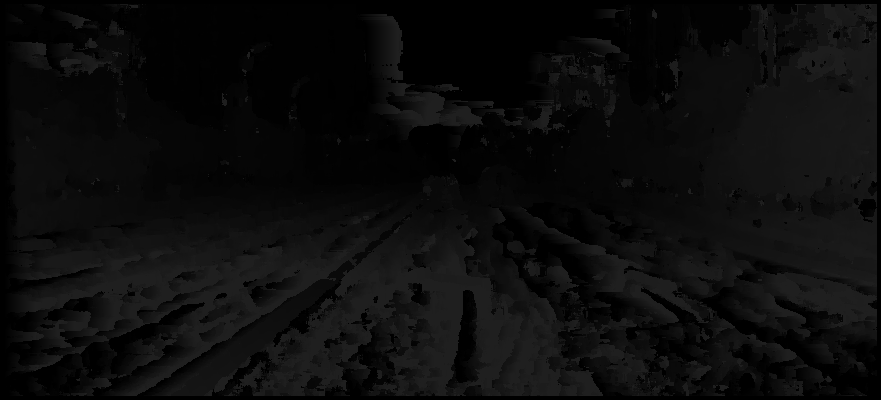

In [36]:
from google.colab.patches import cv2_imshow

cv2_imshow(disparity)

# Question 2

In [41]:
# rms = np.sqrt(np.mean(y**2))


img_truth = cv2.imread('truth.png', cv2.IMREAD_GRAYSCALE)
img_truth = img_truth / 256

avliable_pixels = np.where(img_truth != 0)

errors = np.abs(img_truth[avliable_pixels]-disparity[avliable_pixels])

rms = np.sqrt(np.mean( errors **2))


errors4 = np.where(errors < 4)[0]
errors2 = np.where(errors < 2)[0]
errors1 = np.where(errors < 1)[0]
errors0_5 = np.where(errors< 0.5)[0]
errors0_25 = np.where(errors < 0.25)[0]





print(errors4.shape 
,errors2.shape  
,errors1.shape  
,errors0_5.shape 
,errors0_25.shape )

rms


(11255,) (8873,) (7709,) (6416,) (5987,)


18.186240312248245